# NUDITY DETECTION MODEL

## Stage 1: Preprocessing Data
 Our input images have varied resolution while a model often requires fixed-size inputs so that we need to preprocess them to have a uniform size for our data. To do that, we take two bellow steps:  
 + Dropping 85.5 per cent of the central region of image
 + Resizing them into the size $34 \times 34 \times 3$

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


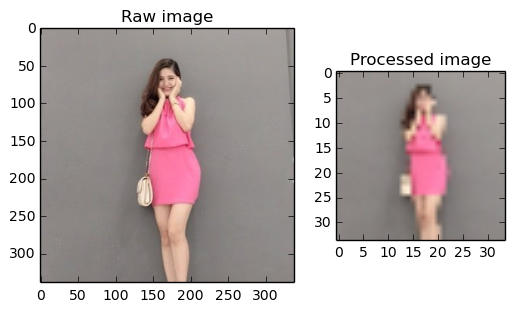

In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from scipy.misc import imread, imresize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from Dataset.data import preprocess_image

image = tf.placeholder("uint8", [None, None, 3])
result_image = preprocess_image(image, 34, 34)
raw_image = imread('/home/taivu/workspace/NudityDetection/Dataset/train/normal/34.jpg')

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result_img = sess.run(result_image, feed_dict={image:raw_image})

################ Plot the raw image and the processed image ##########################
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2]) 

fig = plt.figure()
a1 = fig.add_subplot(gs[0])
a1.set_title("Raw image")
plt.imshow(raw_image)
a2 = fig.add_subplot(gs[1])
a2.set_title("Processed image")
plt.imshow(result_img, shape =(34, 34))
plt.show()

## Stage 2: Build a model
  The model consists of 6 hidden layers including 2 convolutional layers, 2 pool layers, and 2 fully-connected layers. The detail of model are shown in the bellow figure
![NUDITY DETECTION MODE](model.png)

### Stage 2.1: Training the model
  + To training this model, we used a training set with 4000 images with the ratio of nudity to normal images is 1:1. In additional, we alse estimated the model in the training process using a validation set with 2000 images with the ratio is similar to the training.
  + **Cross-entropy** is the loss function to assesses the difference between the predicted labels of model and the real labels of samples. Its notation: $L$
  $$ - \log\left ( \frac{e^{f_y}}{\sum_{j}e^{f_j}} \right ) $$ in which, $f_y$ is the activation of neuron that present the real class of a sample
  + **Mini-batch Gradient Descent** algorithm is used to optimize the weights of the model
  $$\mathit{w}_{t} = \mathit{w}_{t-1} - \alpha \frac{1}{m} \frac{\partial L}{\partial w}$$ in which $\mathit{w}_{t}$ is the weights of model at time $t$ of the optimizing process.
  + The hyper-parameters of model such as the number of images in each mini-batch $m$, learning rate $\alpha$ are set empirically

In [3]:
import tensorflow as tf
from vng_train import train

# Do train the model
train()

### Stage 2.2: Run the model
 + After the training process, the trained weights of model are saved into a hard drive to reuse in the future
 + To run the model, we need to re-construct the model and then load the trained weights into it so that the model will not optimize again its weights in this stage. After the input images are feed-forward via the model, it will only classify them into two classes (*Nudity* or *Normal*) 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import matplotlib.pyplot as plt
from execute_model import evaluate

# Evaluate the model
img, pre_lb, real_lb = evaluate()

fig = plt.figure()
for i in range(10):
    a = fig.add_subplot(2,5, i)
    a.set_title('PL:%d'%(pre_lb[i]))
    a.set_yticklabels([])
    a.set_xticklabels([])
    plt.imshow(img[i])
plt.show()

print pre_lb
print real_lb
#### TODO ####
# Evaluate a image set consisting of almost normal
# Evaluate a image set consisting of almost nudity

[0 1 1 1 1 1 1 1 1 0]
[1 1 1 1 1 1 1 1 1 1]
